# Model contruction

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

heart = pd.read_csv("./heart.csv")

X = heart.drop('output', axis=1)
y = heart['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)



# Evaluation

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}\n')

Accuracy: 0.8360655737704918
Precision: 0.84375
Recall: 0.84375



# SHAP explainer & values

In [4]:
import shap
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

# Summary plot

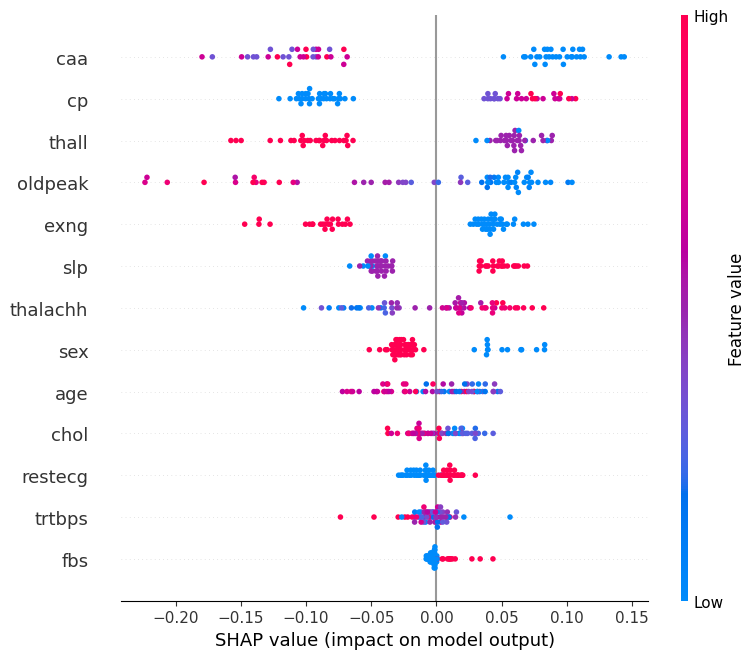

In [5]:
shap.summary_plot(shap_values[:,:,1], X_test)

# Force plot

In [6]:
shap.plots.force(explainer.expected_value[1], shap_values[:,:,1])

# Dependence Plot

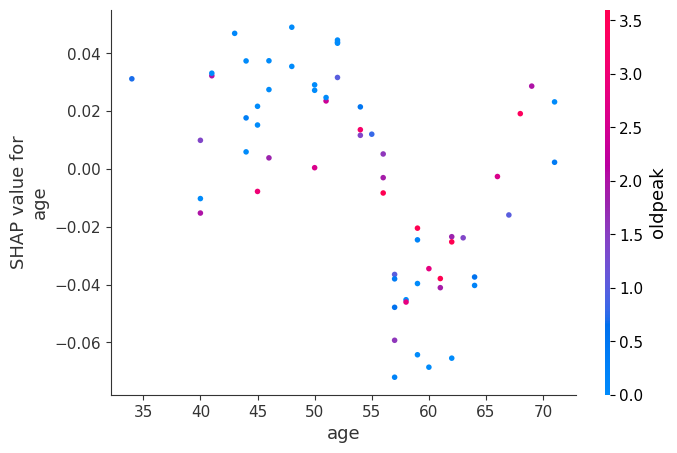

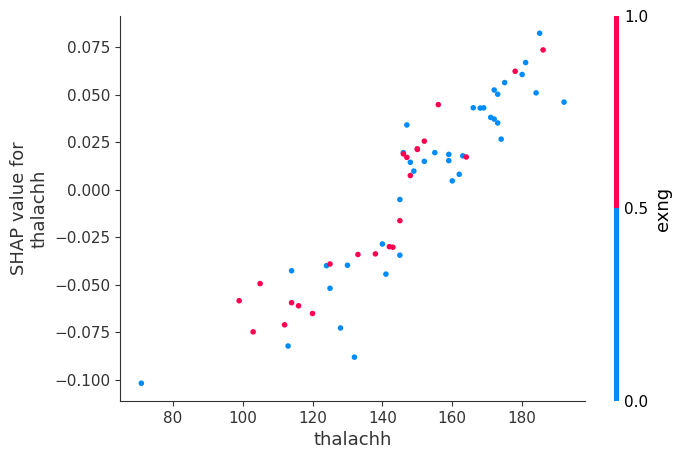

In [7]:
shap.dependence_plot("age", shap_values[:,:,1], X_test)
shap.dependence_plot("thalachh", shap_values[:,:,1], X_test)

# Waterfall plot

# Decision plot

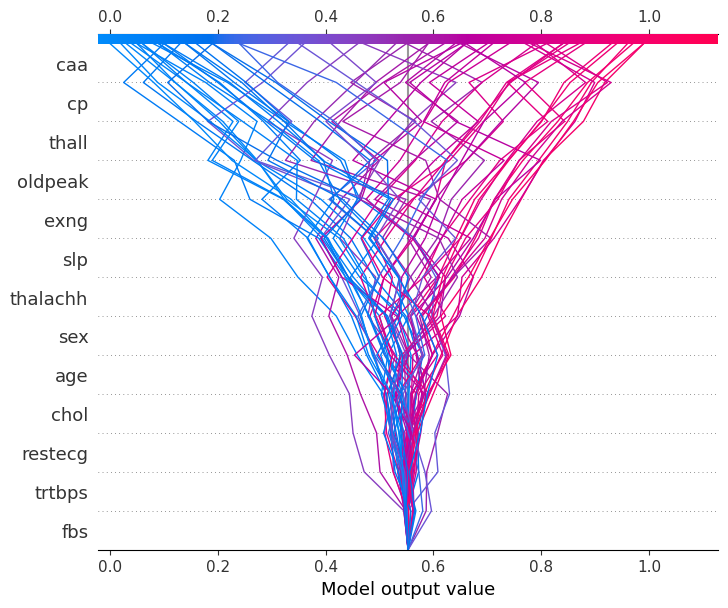

In [8]:
shap.decision_plot(explainer.expected_value[1], shap_values[:,:,1], X_test.columns)